In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
#すべての要素を取得してからHTMLを取得するためにはBeautifulSoupだけであるとやりずらい
#そのためseleniumを使用する。
#seleniumはブラウザの操作を自動化できるツール
#seleniumは要素を読み終えてからのHTMLを取得することもできる。
#seleniumの準備
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin/
!pip install selenium
from selenium import webdriver

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Get:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]


In [3]:
#webブラウザをUIなしで扱うための設定。
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument("--disable-dev-shm-usage")
driver = webdriver.Chrome("chromedriver" , options=options)
driver.implicitly_wait(10)

In [18]:
query = '広瀬すず+かわいい'
url = "https://www.google.com/search?q={}&hl=ja&tbm=isch".format(query)
url

'https://www.google.com/search?q=広瀬すず+かわいい&hl=ja&tbm=isch'

<html dir="ltr" itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ja"><head><base href="https://www.google.com/"/><meta content="origin" name="referrer"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" property="image"/><script async="" nonce="" src="https://apis.google.com/_/scs/abc-static/_/js/k=gapi.gapi.en.40L1XIQnUK4.O/m=gapi_iframes,googleapis_client/rt=j/sv=1/d=1/ed=1/rs=AHpOoo87VqKnhJy5DXHDJekiAyngLi-Q2w/cb=gapi.loaded_0"></script><script data-id="_gd" nonce="">window.WIZ_global_data = {"AY2V6d":true,"DpimGf":false,"EP1ykd":["/_/*","/cameos","/cameos/*","/coronavirus-map","/coronavirus-map/*","/covid19-map","/covid19-map/*","/covid19/exposurenotifications/select","/covid19/exposurenotifications/select/*","/finance","/finance/*","/healthinsurance/immersive","/healthinsurance/immersive/*","/history","/history/*","/local/business","/local/business/*","/local/follow","/local/follow/*","/local/imagery/report","/local/imagery/report/*","/l
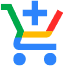
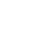
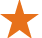
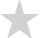
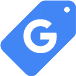
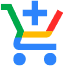
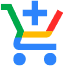
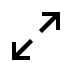
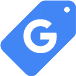
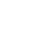
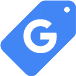
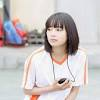
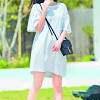
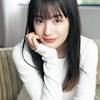
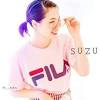
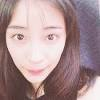
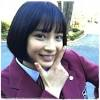
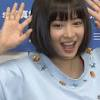
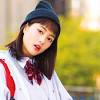
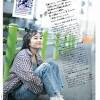
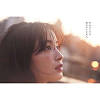
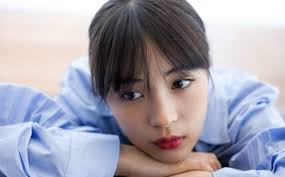
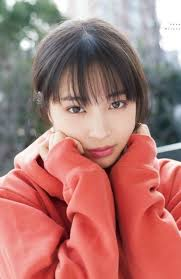
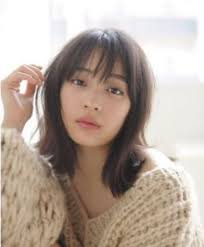
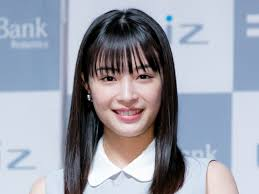
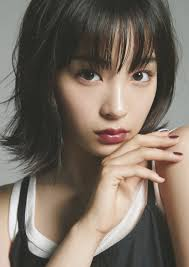
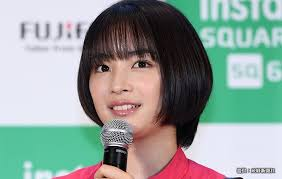
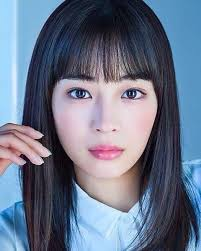
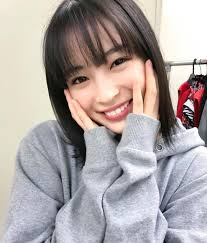
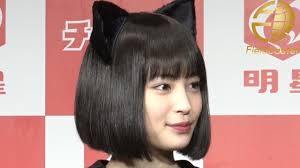
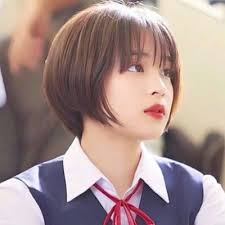
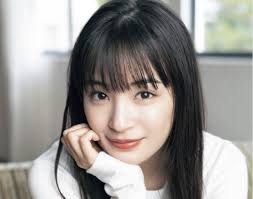
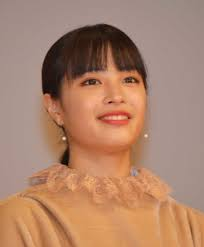
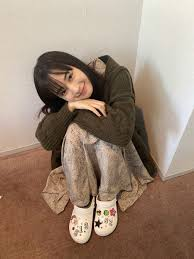
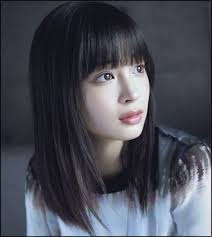
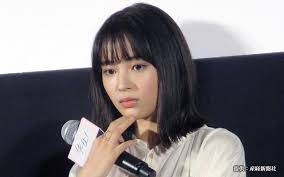
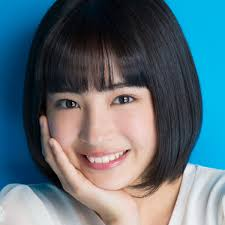
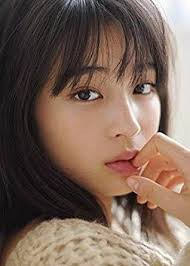
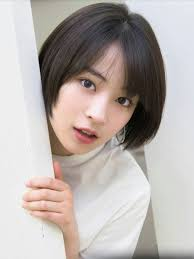
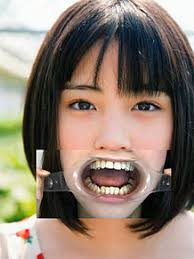
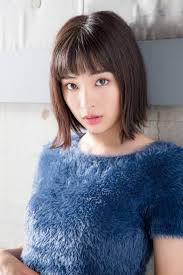

In [19]:
#beautifulsoupの準備
#selenium経由でHTMLを取得する。
#そうすることでページ上のすべての画像が読み込まれた状態のHTMLを取得することが出来る。
driver.get(url)
html = driver.page_source.encode("utf-8")
soup = BeautifulSoup(html , "html.parser")
soup

In [20]:
#seleniumですべての要素が読み込まれるまで待つ、タイムアウトは15秒
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

WebDriverWait(driver , 15).until(EC.presence_of_all_elements_located)

[,
 ,
 ,
 ,
 <img alt="" class="BcUvif" data-atf="true" data-deferred="1" data-iml="1109.5350000005055" height="50" src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQLqJdN6UlgZBGw8m_lXs0CyFRFzd1c_9BPrSPHQSDjMJC1JWhF&amp;usqp=CAU" width="50"/>,
 <img alt="" class="BcUvif" data-atf="true" data-deferred="1" data-iml="1109.6699999998236" height="50" src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQujGPqb0olDOK4CCK714p7kcU0V2DmjdTzB2rQMz0&amp;usqp=CAU" width="50"/>,
 ,
 ,
 ,
 ,
 ,
 ,
 <img class="BcUvif" data-ils="2" height="50" jsaction="rcuQ6b:trigger.M8vzZb;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTyinCdpzKtJ1LyXTkBxZQuOSfEYJMgniBqVmFcbAJqtJLP-DiI&amp;usqp=CAU" width="50"/>,
 <img class="BcUvif" data-ils="2" height="50" jsaction="rcuQ6b:trigger.M8vzZb;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRCTPO8Kc6riO7XM6L9krzkZXXvcSLTy8R_eQfymeoNWVArexE4&amp;usqp=CAU" width="50"/>,
 <img class="BcUvif" data-ils="2" height="50" jsact
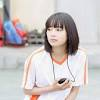
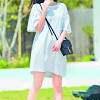
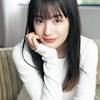
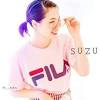
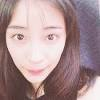
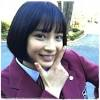
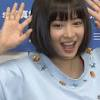
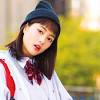
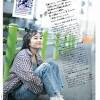
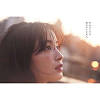
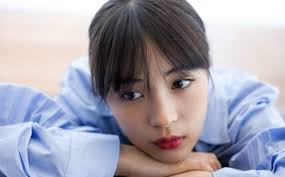
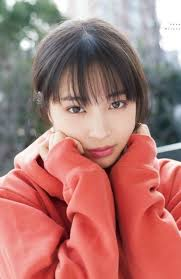
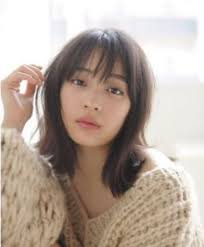
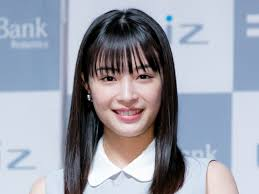
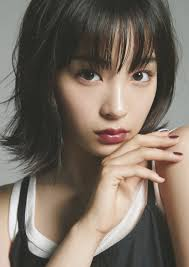
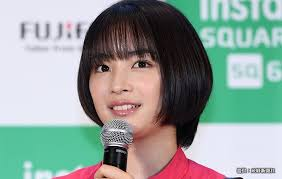
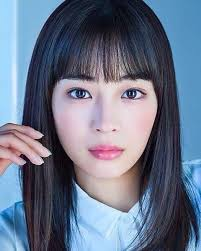
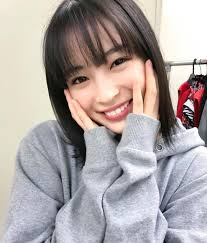
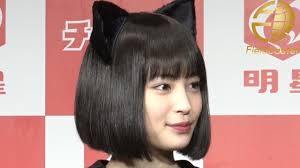
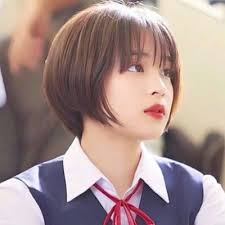
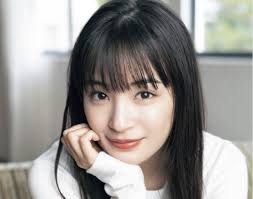
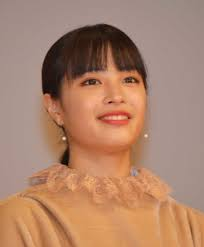
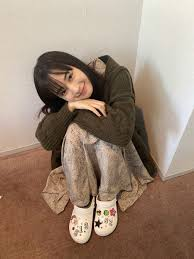
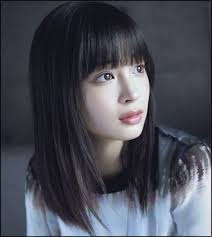
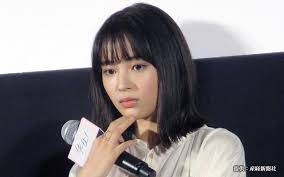
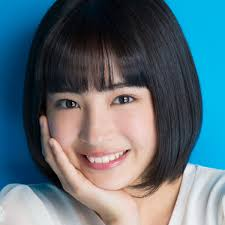
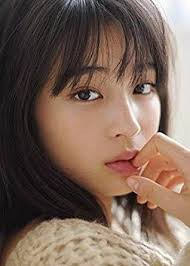
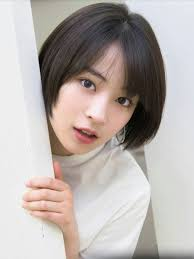
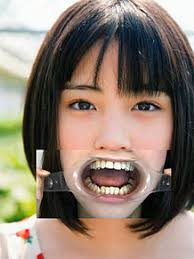
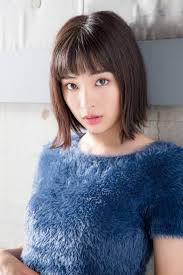

In [21]:
soup.find_all("img")

In [23]:
#画像の数
img_tags = soup.find_all("img")
len(img_tags)

77





https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQLqJdN6UlgZBGw8m_lXs0CyFRFzd1c_9BPrSPHQSDjMJC1JWhF&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQujGPqb0olDOK4CCK714p7kcU0V2DmjdTzB2rQMz0&usqp=CAU






https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTyinCdpzKtJ1LyXTkBxZQuOSfEYJMgniBqVmFcbAJqtJLP-DiI&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRCTPO8Kc6riO7XM6L9krzkZXXvcSLTy8R_eQfymeoNWVArexE4&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRx1gdKAUdAqtRMEk1Um2GkUzXDtnQkqzHQM-yYBmkF66Hk0hBI&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTZ84oTh4gA2c5EkTpAa4Ru1iQQKUoVV21eOp3YDCclxeuXgfjy&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTlNtvUbjW3U-mOpxY5Asa70Acdt2wDUJa7xNRqTxWh8mToIL4J&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ1IB-4hKwcLOPvoenYCqQdD2Qhyl8yIwLj2ToIIwPoeiTH-Yr8&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRjBLH3HSAVho-30
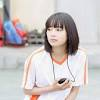
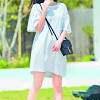
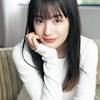
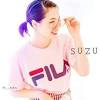
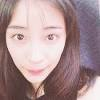
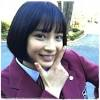
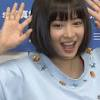
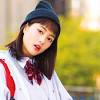
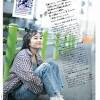
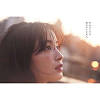
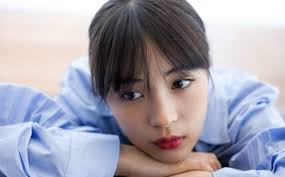
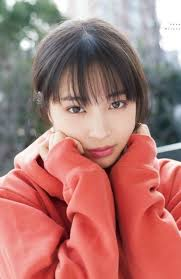
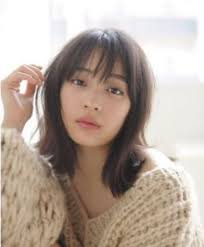
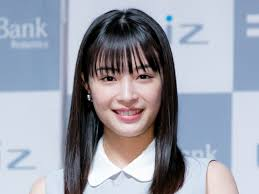
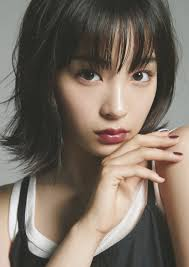
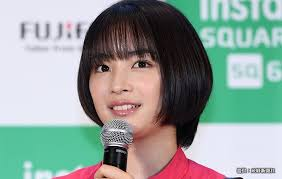
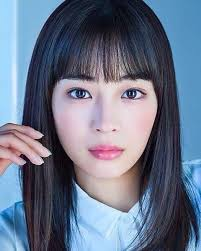
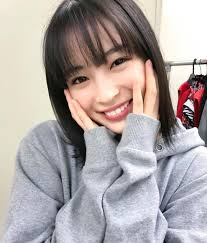
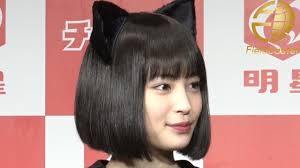
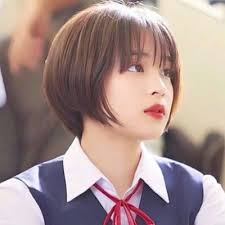
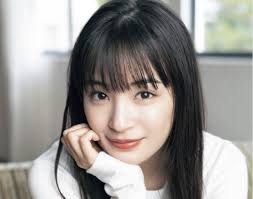
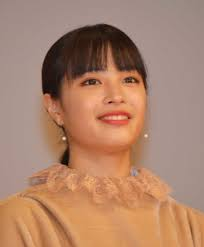
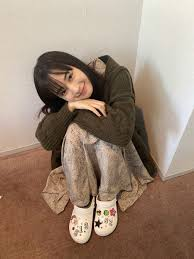
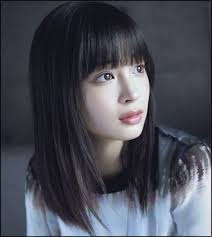
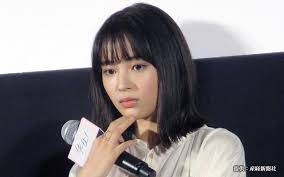
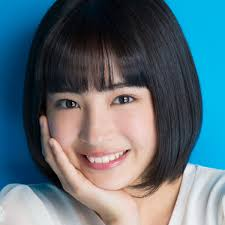
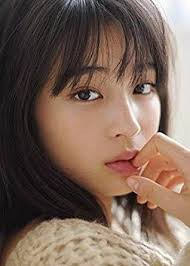
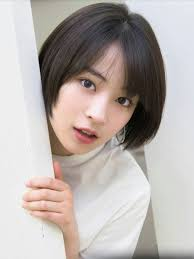
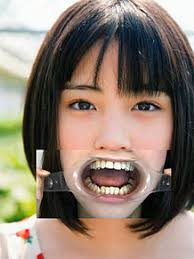
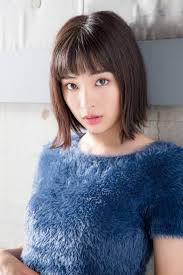

In [24]:
#base64は画像をテキストにしている。高速に読み込むことが出来る。
#srcは画像
#テキストから画像に戻すためにデコードを行う。
#base64のデータ
img_urls = []
for img_tag in img_tags:
    #base64のデータを取得している。
    url = img_tag.get("src")
    
    
    if url is None:
        url = img_tag.get("data-src")
    
    if url is not None:
        #画像データを取得
        img_urls.append(url)
        print(url)


In [14]:
#画像をダウンロードする。
def download_image(url , file_path):
    r = requests.get(url , stream=True)

    if r.status_code == 200:
        with open(file_path , "wb") as f:
            f.write(r.content)

In [15]:
#base64をデコードして画像に戻す関数の追加
import base64

def save_base64_image(data ,  file_path):
    img = base64.b64decode(data.encode())
    with open(file_path , "wb") as f:
        f.write(img)

In [25]:
import os
import re
save_dir = "/content/drive/My Drive/machine_learning/image"
os.makedirs(save_dir , exist_ok = True)

base64_string = "data:image/jpeg;base64,"

for index , url in enumerate(img_urls):
    file_name = "suzu{}".format(index+83)
    #print(file_name)
    #print(url)

    #os.path.joinを使用する事で引数に指定した文字列をパスの形につなげることが出来る。
    image_path = os.path.join(save_dir , file_name)

    #接頭辞(data:image/jpeg;base64の部分)の削除を行う。
    if len(re.findall(base64_string , url)) > 0:#1件でもあれば削除を行う。
        url = url.replace(base64_string , "")#接頭辞をurlからなくしている。
        save_base64_image(data=url , file_path=image_path)#指定のファイルパスに保存
    else:
        download_image(url=url , file_path=image_path)


